### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "oct_scan_end_of_collapse_round"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  qx     qy     i_oct_b1 i_oct_b2                      
lhcb1 62.305 60.310 -300.0   -300.0        base_collider   
                    -275.0   -275.0        base_collider   
                    -250.0   -250.0        base_collider   
                    -225.0   -225.0        base_collider   
                    -200.0   -200.0        base_collider   
...                                                  ...   
      62.329 60.334  200.0    200.0        base_collider   
                     225.0    225.0        base_collider   
                     250.0    250.0        base_collider   
                     275.0    275.0        base_collider   
                     300.0    300.0        base_collider   

                                       normalized amplitude in xy-plane  \
beam  qx     qy     i_oct_b1 i_oct_b2                                     
lhcb1 62.305 60.310 -300.0   -300.0                               4.000   
                    -275.0   -275.0                               4.000   
                    -250.0   -250.0                               4.000   
                    -225.0   -225.0                               4.062   
                    -200.0   -200.0                               4.031   
...                                                                 ...   
      62.329 60.334  200.0    200.0                               4.000   
                     225.0    225.0                               4.000   
                     250.0    250.0                               4.000   
                     275.0    275.0                               4.000   
                     300.0    300.0                               4.000   

                                           qx      qy   dqx   dqy  i_bunch_b1  \
beam  qx     qy     i_oct_b1 i_oct_b2                                           
lhcb1 62.305 60.310 -300.0   -300.0    62.305  60.310  15.0  15.0       150.0   
                    -275.0   -275.0    62.305  60.310  15.0  15.0       150.0   
                    -250.0   -250.0    62.305  60.310  15.0  15.0       150.0   
                    -225.0   -225.0    62.305  60.310  15.0  15.0       150.0   
                    -200.0   -200.0    62.305  60.310  15.0  15.0       150.0   
...                                       ...     ...   ...   ...         ...   
      62.329 60.334  200.0    200.0    62.329  60.334  15.0  15.0       150.0   
                     225.0    225.0    62.329  60.334  15.0  15.0       150.0   
                     250.0    250.0    62.329  60.334  15.0  15.0       150.0   
                     275.0    275.0    62.329  60.334  15.0  15.0       150.0   
                     300.0    300.0    62.329  60.334  15.0  15.0       150.0   

                                       i_bunch_b2  i_oct_b1  i_oct_b2  \
beam  qx     qy     i_oct_b1 i_oct_b2                                   
lhcb1 62.305 60.310 -300.0   -300.0         147.0    -300.0    -300.0   
                    -275.0   -275.0         147.0    -275.0    -275.0   
                    -250.0   -250.0         147.0    -250.0    -250.0   
                    -225.0   -225.0         147.0    -225.0    -225.0   
                    -200.0   -200.0         147.0    -200.0    -200.0   
...                                           ...       ...       ...   
      62.329 60.334  200.0    200.0         147.0     200.0     200.0   
                     225.0    225.0         147.0     225.0     225.0   
                     250.0    250.0         147.0     250.0     250.0   
                     275.0    275.0         147.0     275.0     275.0   
                     300.0    300.0         147.0     300.0     300.0   

                                       num_particles_per_bunch  crossing_angle  
beam  qx     qy     i_oct_b1 i_oct_b2                                           
lhcb1 62.305 60.310 -300.0   -300.0               2.200000e+11           250.0  
                    -275.0   -275.

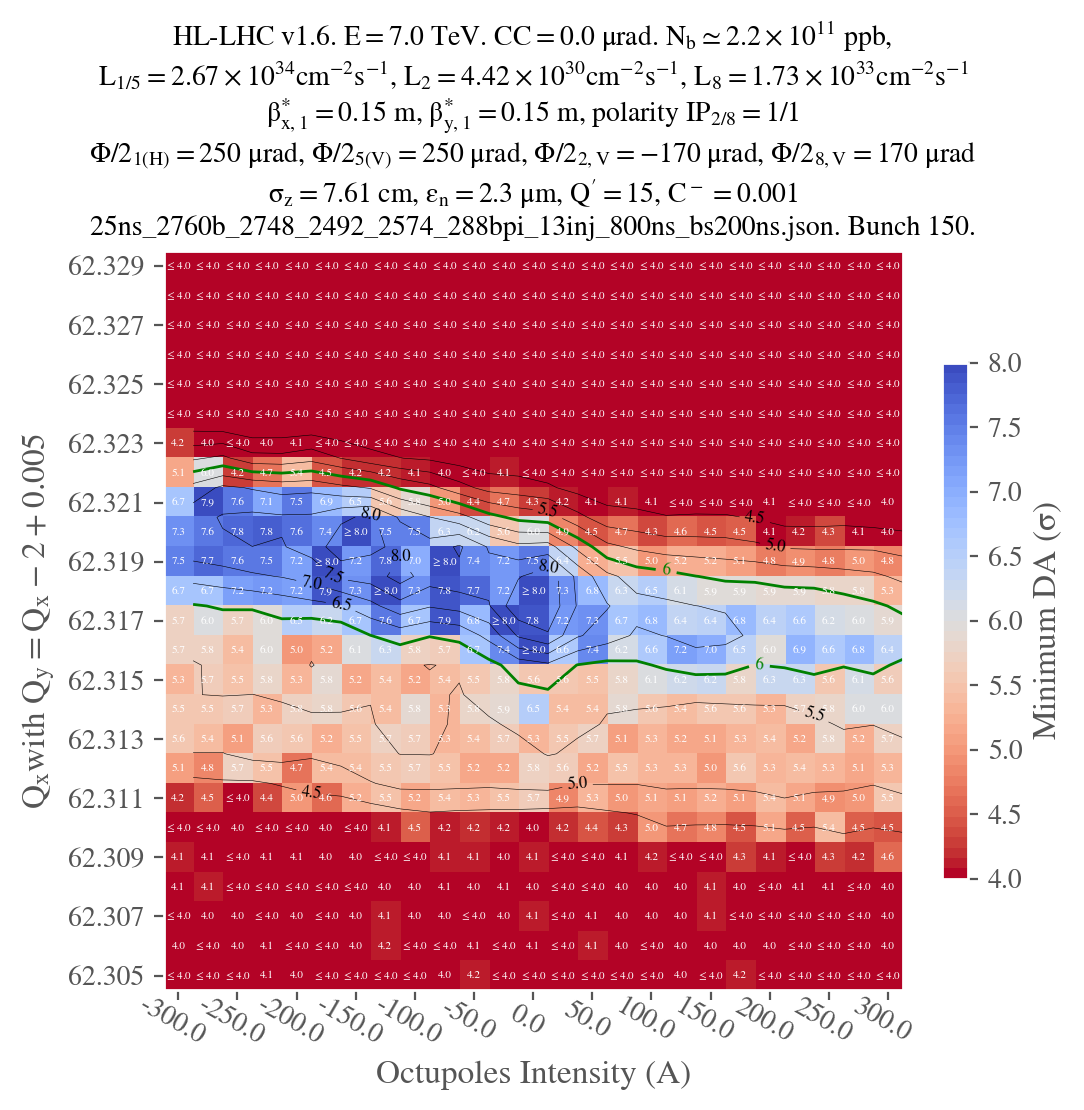

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="i_oct_b1", values="normalized amplitude in xy-plane")

l_oct = np.linspace(-300,300,25)
df_to_plot.columns = [str(oct) for oct in l_oct]

# replace nan in df by 10
df_to_plot = df_to_plot.fillna(10)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = "Octupoles Intensity (A)"
ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$"
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx = 0.15,
    bety = 0.15,
    type_crossing="flathv",
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    green_contour=6.,
    CC = True,
    vmin=4.,
    vmax=8.0,
    extended_diagonal=False,
    Nb=True,
    #title="opt_collapse_1100_1500_oct_scan",
)